In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from datetime import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

In [3]:
cities_df = pd.DataFrame(cities)

,0
0,tiksi
1,jurilovca
2,dwarka
3,thompson
4,atuona


In [4]:
name = []
clouds = []
country = []
date = []
humidity = []
lat = []
lng = []
temp_max = []
wind_speed = []

In [5]:
#Perform API Calls
#Perform a weather check on each city using a series of successive API calls.
#Include a print log of each city as it's being processed (with the city number and city name).
params = {"appid": api_key,
         "units": "Imperial"}

print("Beginning Data Retrieval")
print("----------------------------------------")

for index, row in cities_df.iterrows():
    try:
        index <= 500
        base_url = "http://api.openweathermap.org/data/2.5/weather?"
        query_city = row[0]
        params['query_city'] = query_city

        print(f"Processing Record {index} of Set 1 | {query_city}")
    
        url = base_url + "q=" + query_city + "&appid=" + api_key 
        
        response = requests.get(url, params=params).json()
        
        name.append(response['name'])
        clouds.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp_max.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        
        #remove this line
        print(json.dumps(response, indent=4, sort_keys=True))
        
    except (KeyError, IndexError):
        print("City not found. Skipping...")
    
print("----------------------------------------")
print("Data Retrieval Complete")
print("----------------------------------------")
    


Beginning Data Retrieval
----------------------------------------
Processing Record 0 of Set 1 | tiksi
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 71.64,
        "lon": 128.87
    },
    "dt": 1567364844,
    "id": 2015306,
    "main": {
        "grnd_level": 996.86,
        "humidity": 84,
        "pressure": 1007.99,
        "sea_level": 1007.99,
        "temp": 39.11,
        "temp_max": 39.11,
        "temp_min": 39.11
    },
    "name": "Tiksi",
    "sys": {
        "country": "RU",
        "message": 0.0054,
        "sunrise": 1567366227,
        "sunset": 1567423134
    },
    "timezone": 32400,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 27.716,
        "speed": 5.28
    }
}
Processing Record 1 of Set 1 | jurilovca
{
    "base": "stations",
    "clouds": {
 

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 65.61,
        "lon": -37.64
    },
    "dt": 1567364813,
    "id": 3424607,
    "main": {
        "humidity": 49,
        "pressure": 1009,
        "temp": 46.4,
        "temp_max": 46.4,
        "temp_min": 46.4
    },
    "name": "Tasiilaq",
    "sys": {
        "country": "GL",
        "id": 81,
        "message": 0.0087,
        "sunrise": 1567321604,
        "sunset": 1567374903,
        "type": 1
    },
    "timezone": -7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02d",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 230,
        "speed": 9.17
    }
}
Processing Record 12 of Set 1 | bredasdorp
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -34.53,
        "lon": 20.04
    },
    "d

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 66.5,
        "lon": 25.72
    },
    "dt": 1567364849,
    "id": 638936,
    "main": {
        "humidity": 87,
        "pressure": 1011,
        "temp": 60.8,
        "temp_max": 60.8,
        "temp_min": 60.8
    },
    "name": "Rovaniemi",
    "sys": {
        "country": "FI",
        "id": 1354,
        "message": 0.0071,
        "sunrise": 1567306139,
        "sunset": 1567359962,
        "type": 1
    },
    "timezone": 10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 140,
        "speed": 3.36
    }
}
Processing Record 22 of Set 1 | georgetown
{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 6.8,
        "lon": -58.16
    },
    "dt": 

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -12.93,
        "lon": 34.3
    },
    "dt": 1567364851,
    "id": 924705,
    "main": {
        "grnd_level": 910.48,
        "humidity": 46,
        "pressure": 1012.58,
        "sea_level": 1012.58,
        "temp": 67.55,
        "temp_max": 67.55,
        "temp_min": 67.55
    },
    "name": "Nkhotakota",
    "sys": {
        "country": "MW",
        "message": 0.0051,
        "sunrise": 1567309652,
        "sunset": 1567352331
    },
    "timezone": 7200,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 203.065,
        "speed": 0.76
    }
}
Processing Record 34 of Set 1 | mount isa
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -20.73,
        "lon": 139.49
    },
  

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 65.8,
        "lon": 87.96
    },
    "dt": 1567364854,
    "id": 1488903,
    "main": {
        "grnd_level": 1001.66,
        "humidity": 82,
        "pressure": 1004.58,
        "sea_level": 1004.58,
        "temp": 52.97,
        "temp_max": 52.97,
        "temp_min": 52.97
    },
    "name": "Turukhansk",
    "sys": {
        "country": "RU",
        "message": 0.0061,
        "sunrise": 1567377939,
        "sunset": 1567431054
    },
    "timezone": 25200,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 77.596,
        "speed": 6.24
    }
}
Processing Record 45 of Set 1 | qaanaaq
{
    "base": "stations",
    "clouds": {
        "all": 11
    },
    "cod": 200,
    "coord": {
        "lat": 77.48,
        "lon": -69.36
 

{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 72.79,
        "lon": -56.15
    },
    "dt": 1567364856,
    "id": 3418910,
    "main": {
        "grnd_level": 1000.32,
        "humidity": 77,
        "pressure": 999.96,
        "sea_level": 999.96,
        "temp": 43.61,
        "temp_max": 43.61,
        "temp_min": 43.61
    },
    "name": "Upernavik",
    "sys": {
        "country": "GL",
        "message": 0.0057,
        "sunrise": 1567323542,
        "sunset": 1567381847
    },
    "timezone": -7200,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 194.853,
        "speed": 10.58
    }
}
Processing Record 55 of Set 1 | bandar-e lengeh
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 26.56,
        "lon": 54.88
   

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": -0.6,
        "lon": 73.08
    },
    "dt": 1567364814,
    "id": 1282256,
    "main": {
        "grnd_level": 1011.23,
        "humidity": 78,
        "pressure": 1011.41,
        "sea_level": 1011.41,
        "temp": 83.21,
        "temp_max": 83.21,
        "temp_min": 83.21
    },
    "name": "Hithadhoo",
    "sys": {
        "country": "MV",
        "message": 0.0064,
        "sunrise": 1567386286,
        "sunset": 1567429848
    },
    "timezone": 18000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 118.109,
        "speed": 11.59
    }
}
Processing Record 65 of Set 1 | saint-philippe
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 45.36,
        "lon": -

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 60.25,
        "lon": 24.07
    },
    "dt": 1567364861,
    "id": 647751,
    "main": {
        "humidity": 77,
        "pressure": 1014,
        "temp": 60.87,
        "temp_max": 63,
        "temp_min": 57
    },
    "name": "Lohja",
    "sys": {
        "country": "FI",
        "id": 1332,
        "message": 0.0069,
        "sunrise": 1567307827,
        "sunset": 1567359065,
        "type": 1
    },
    "timezone": 10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 90,
        "speed": 4.7
    }
}
Processing Record 75 of Set 1 | fort nelson
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 58.81,
        "lon": -122.69
    },
    "dt": 1567

{
    "base": "stations",
    "clouds": {
        "all": 31
    },
    "cod": 200,
    "coord": {
        "lat": 68.75,
        "lon": 161.3
    },
    "dt": 1567364863,
    "id": 2126199,
    "main": {
        "grnd_level": 1013.34,
        "humidity": 85,
        "pressure": 1013.96,
        "sea_level": 1013.96,
        "temp": 29.03,
        "temp_max": 29.03,
        "temp_min": 29.03
    },
    "name": "Cherskiy",
    "sys": {
        "country": "RU",
        "message": 0.0056,
        "sunrise": 1567359487,
        "sunset": 1567414311
    },
    "timezone": 39600,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 167.854,
        "speed": 2.1
    }
}
Processing Record 85 of Set 1 | rawson
{
    "base": "stations",
    "clouds": {
        "all": 17
    },
    "cod": 200,
    "coord": {
        "lat": -43.3,
        "lon": -65.11
   

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 15.13,
        "lon": -23.22
    },
    "dt": 1567364866,
    "id": 3374120,
    "main": {
        "humidity": 78,
        "pressure": 1009,
        "temp": 82.4,
        "temp_max": 82.4,
        "temp_min": 82.4
    },
    "name": "Vila do Maio",
    "sys": {
        "country": "CV",
        "id": 2462,
        "message": 0.0064,
        "sunrise": 1567322438,
        "sunset": 1567367149,
        "type": 1
    },
    "timezone": -3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04d",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 210,
        "speed": 10.29
    }
}
Processing Record 98 of Set 1 | sibu
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 2.29,
        "lon": 111.83
    },
  

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 58.3,
        "lon": -134.42
    },
    "dt": 1567364869,
    "id": 5554072,
    "main": {
        "humidity": 51,
        "pressure": 1016,
        "temp": 59.58,
        "temp_max": 62.6,
        "temp_min": 57.2
    },
    "name": "Juneau",
    "sys": {
        "country": "US",
        "id": 7729,
        "message": 0.0066,
        "sunrise": 1567346222,
        "sunset": 1567396729,
        "type": 1
    },
    "timezone": -28800,
    "visibility": 16093,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02d",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 240,
        "speed": 4.7
    }
}
Processing Record 110 of Set 1 | longyearbyen
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 78.22,
        "lon": 15.63
    },
  

{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": -41.87,
        "lon": -73.83
    },
    "dt": 1567364871,
    "id": 3899695,
    "main": {
        "humidity": 57,
        "pressure": 1026,
        "temp": 50,
        "temp_max": 50,
        "temp_min": 50
    },
    "name": "Ancud",
    "sys": {
        "country": "CL",
        "id": 8512,
        "message": 0.0071,
        "sunrise": 1567336870,
        "sunset": 1567377004,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03d",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 190,
        "speed": 12.75
    }
}
Processing Record 122 of Set 1 | isangel
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": -19.55,
        "lon": 169.27
    },
   

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 60.14,
        "lon": -45.24
    },
    "dt": 1567364874,
    "id": 3421765,
    "main": {
        "grnd_level": 995.97,
        "humidity": 80,
        "pressure": 1005.38,
        "sea_level": 1005.38,
        "temp": 44.51,
        "temp_max": 44.51,
        "temp_min": 44.51
    },
    "name": "Nanortalik",
    "rain": {
        "3h": 0.626
    },
    "sys": {
        "country": "GL",
        "message": 0.0079,
        "sunrise": 1567324507,
        "sunset": 1567375647
    },
    "timezone": -7200,
    "weather": [
        {
            "description": "light rain",
            "icon": "10d",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 91.727,
        "speed": 8.16
    }
}
Processing Record 133 of Set 1 | lebu
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "la

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -17.91,
        "lon": 19.77
    },
    "dt": 1567364877,
    "id": 3353383,
    "main": {
        "humidity": 7,
        "pressure": 1022,
        "temp": 71.6,
        "temp_max": 71.6,
        "temp_min": 71.6
    },
    "name": "Rundu",
    "sys": {
        "country": "NA",
        "id": 2277,
        "message": 0.0055,
        "sunrise": 1567313323,
        "sunset": 1567355633,
        "type": 1
    },
    "timezone": 7200,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 160,
        "speed": 3.36
    }
}
Processing Record 144 of Set 1 | labuhan
{
    "base": "stations",
    "clouds": {
        "all": 48
    },
    "cod": 200,
    "coord": {
        "lat": -2.54,
        "lon": 115.51
    },
    "dt": 1567364877,
    "id": 164189

{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 43.97,
        "lon": -111.68
    },
    "dt": 1567364879,
    "id": 5606187,
    "main": {
        "humidity": 27,
        "pressure": 1021,
        "temp": 82.9,
        "temp_max": 88,
        "temp_min": 78.8
    },
    "name": "Saint Anthony",
    "sys": {
        "country": "US",
        "id": 5735,
        "message": 0.0079,
        "sunrise": 1567342201,
        "sunset": 1567389837,
        "type": 1
    },
    "timezone": -21600,
    "visibility": 16093,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 180.048,
        "speed": 5.3
    }
}
Processing Record 154 of Set 1 | burns lake
{
    "base": "stations",
    "clouds": {
        "all": 38
    },
    "cod": 200,
    "coord": {
        "lat": 54.23,
        "lon": -125.76
   

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": -33.93,
        "lon": 18.42
    },
    "dt": 1567364882,
    "id": 3369157,
    "main": {
        "humidity": 76,
        "pressure": 1023,
        "temp": 57.43,
        "temp_max": 59,
        "temp_min": 55.99
    },
    "name": "Cape Town",
    "sys": {
        "country": "ZA",
        "id": 1899,
        "message": 0.0072,
        "sunrise": 1567314327,
        "sunset": 1567355277,
        "type": 1
    },
    "timezone": 7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02n",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 320,
        "speed": 4.7
    }
}
Processing Record 166 of Set 1 | codrington
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": -28.95,
        "lon": 153.24
    },
  

{
    "base": "stations",
    "clouds": {
        "all": 36
    },
    "cod": 200,
    "coord": {
        "lat": -30.17,
        "lon": -50.22
    },
    "dt": 1567364884,
    "id": 3466165,
    "main": {
        "grnd_level": 1016.94,
        "humidity": 50,
        "pressure": 1017.76,
        "sea_level": 1017.76,
        "temp": 63.23,
        "temp_max": 63.23,
        "temp_min": 63.23
    },
    "name": "Cidreira",
    "sys": {
        "country": "BR",
        "message": 0.0068,
        "sunrise": 1567330610,
        "sunset": 1567371933
    },
    "timezone": -10800,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03d",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 244.135,
        "speed": 7.54
    }
}
Processing Record 177 of Set 1 | vila velha
{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": -3.71,
        "lon": -

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": -21.55,
        "lon": 167.88
    },
    "dt": 1567364887,
    "id": 2138285,
    "main": {
        "grnd_level": 1012.37,
        "humidity": 91,
        "pressure": 1012.6,
        "sea_level": 1012.6,
        "temp": 73.49,
        "temp_max": 73.49,
        "temp_min": 73.49
    },
    "name": "Tadine",
    "rain": {
        "3h": 14.5
    },
    "sys": {
        "country": "NC",
        "message": 0.0066,
        "sunrise": 1567364286,
        "sunset": 1567406355
    },
    "timezone": 39600,
    "weather": [
        {
            "description": "heavy intensity rain",
            "icon": "10n",
            "id": 502,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 19.496,
        "speed": 23.44
    }
}
Processing Record 187 of Set 1 | acapulco
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
  

{
    "base": "stations",
    "clouds": {
        "all": 62
    },
    "cod": 200,
    "coord": {
        "lat": -8.9,
        "lon": -35.15
    },
    "dt": 1567364889,
    "id": 3388456,
    "main": {
        "grnd_level": 1002.94,
        "humidity": 82,
        "pressure": 1013.98,
        "sea_level": 1013.98,
        "temp": 77.27,
        "temp_max": 77.27,
        "temp_min": 77.27
    },
    "name": "Sao Jose da Coroa Grande",
    "rain": {
        "3h": 1.063
    },
    "sys": {
        "country": "BR",
        "message": 0.0078,
        "sunrise": 1567326168,
        "sunset": 1567369144
    },
    "timezone": -10800,
    "weather": [
        {
            "description": "light rain",
            "icon": "10d",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 114.178,
        "speed": 9.55
    }
}
Processing Record 197 of Set 1 | sadiqabad
{
    "base": "stations",
    "clouds": {
        "all": 43
    },
    "cod": 200,
    "co

{
    "base": "stations",
    "clouds": {
        "all": 11
    },
    "cod": 200,
    "coord": {
        "lat": 65.44,
        "lon": 52.15
    },
    "dt": 1567364892,
    "id": 477940,
    "main": {
        "grnd_level": 1011.1,
        "humidity": 93,
        "pressure": 1018.34,
        "sea_level": 1018.34,
        "temp": 42.71,
        "temp_max": 42.71,
        "temp_min": 42.71
    },
    "name": "Ust-Tsilma",
    "sys": {
        "country": "RU",
        "message": 0.0076,
        "sunrise": 1567300048,
        "sunset": 1567353369
    },
    "timezone": 10800,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02n",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 31.38,
        "speed": 3.18
    }
}
Processing Record 207 of Set 1 | maldonado
{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": -34.91,
        "lon": -54.96
    }

{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 40.6,
        "lon": -124.16
    },
    "dt": 1567364895,
    "id": 5563839,
    "main": {
        "humidity": 82,
        "pressure": 1017,
        "temp": 71.19,
        "temp_max": 82,
        "temp_min": 62.6
    },
    "name": "Fortuna",
    "sys": {
        "country": "US",
        "id": 4127,
        "message": 0.0073,
        "sunrise": 1567345431,
        "sunset": 1567392596,
        "type": 1
    },
    "timezone": -25200,
    "visibility": 16093,
    "weather": [
        {
            "description": "haze",
            "icon": "50d",
            "id": 721,
            "main": "Haze"
        }
    ],
    "wind": {
        "deg": 300,
        "speed": 13.87
    }
}
Processing Record 219 of Set 1 | kodiak
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 39.95,
        "lon": -94.76
    },
    "dt": 15673

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": -43.03,
        "lon": 147.26
    },
    "dt": 1567364897,
    "id": 2158744,
    "main": {
        "humidity": 81,
        "pressure": 1016,
        "temp": 44.85,
        "temp_max": 46.99,
        "temp_min": 42.01
    },
    "name": "Margate",
    "sys": {
        "country": "AU",
        "id": 9545,
        "message": 0.0069,
        "sunrise": 1567370239,
        "sunset": 1567410297,
        "type": 1
    },
    "timezone": 36000,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02n",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 320,
        "speed": 8.05
    }
}
Processing Record 229 of Set 1 | kyotera
{
    "base": "stations",
    "clouds": {
        "all": 3
    },
    "cod": 200,
    "coord": {
        "lat": -0.63,
        "lon": 31.54
    },
    

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 41.96,
        "lon": 42.96
    },
    "dt": 1567364900,
    "id": 610864,
    "main": {
        "humidity": 94,
        "pressure": 1010,
        "temp": 69.8,
        "temp_max": 69.8,
        "temp_min": 69.8
    },
    "name": "Khani",
    "sys": {
        "country": "GE",
        "id": 8856,
        "message": 0.0059,
        "sunrise": 1567305203,
        "sunset": 1567352624,
        "type": 1
    },
    "timezone": 14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "speed": 3.36
    }
}
Processing Record 241 of Set 1 | texarkana
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 33.44,
        "lon": -94.04
    },
    "dt": 1567364771,
    "id": 

{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 50.23,
        "lon": -63.6
    },
    "dt": 1567364902,
    "id": 5972291,
    "main": {
        "humidity": 58,
        "pressure": 1023,
        "temp": 55.4,
        "temp_max": 55.4,
        "temp_min": 55.4
    },
    "name": "Havre-Saint-Pierre",
    "sys": {
        "country": "CA",
        "id": 812,
        "message": 0.0107,
        "sunrise": 1567330133,
        "sunset": 1567378831,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 14484,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 250,
        "gust": 27.51,
        "speed": 19.46
    }
}
Processing Record 252 of Set 1 | corrales
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 5.83,
   

{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 22.81,
        "lon": 114.46
    },
    "dt": 1567364905,
    "id": 1813812,
    "main": {
        "humidity": 88,
        "pressure": 1007,
        "temp": 78.98,
        "temp_max": 80.01,
        "temp_min": 77
    },
    "name": "Danshui",
    "sys": {
        "country": "CN",
        "id": 9630,
        "message": 0.0094,
        "sunrise": 1567375492,
        "sunset": 1567420784,
        "type": 1
    },
    "timezone": 28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "light intensity shower rain",
            "icon": "09n",
            "id": 520,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 30,
        "speed": 6.71
    }
}
Processing Record 265 of Set 1 | hami
{
    "base": "stations",
    "clouds": {
        "all": 13
    },
    "cod": 200,
    "coord": {
        "lat": 42.84,
        "lon": 93.51
   

City not found. Skipping...
Processing Record 277 of Set 1 | pekan
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 3.49,
        "lon": 103.39
    },
    "dt": 1567364786,
    "id": 1734971,
    "main": {
        "humidity": 88,
        "pressure": 1010,
        "temp": 78.26,
        "temp_max": 78.8,
        "temp_min": 78.01
    },
    "name": "Pekan",
    "sys": {
        "country": "MY",
        "id": 9432,
        "message": 0.0082,
        "sunrise": 1567378873,
        "sunset": 1567422716,
        "type": 1
    },
    "timezone": 28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 325.927,
        "speed": 1.48
    }
}
Processing Record 278 of Set 1 | saint-augustin
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 39.17,
        "lon": 25.93
    },
    "dt": 1567364910,
    "id": 262629,
    "main": {
        "humidity": 54,
        "pressure": 1009,
        "temp": 80.6,
        "temp_max": 80.6,
        "temp_min": 80.6
    },
    "name": "Eresos",
    "sys": {
        "country": "GR",
        "id": 6636,
        "message": 0.007,
        "sunrise": 1567309478,
        "sunset": 1567356522,
        "type": 1
    },
    "timezone": 10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 310,
        "speed": 5.82
    }
}
Processing Record 289 of Set 1 | kysyl-syr
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 63.9,
        "lon": 122.77
    },
    "dt": 1

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 35.03,
        "lon": 136.69
    },
    "dt": 1567364913,
    "id": 1848373,
    "main": {
        "humidity": 88,
        "pressure": 1018,
        "temp": 74.16,
        "temp_max": 75,
        "temp_min": 73.4
    },
    "name": "Fukue",
    "sys": {
        "country": "JP",
        "id": 8009,
        "message": 0.0074,
        "sunrise": 1567369573,
        "sunset": 1567416036,
        "type": 1
    },
    "timezone": 32400,
    "visibility": 8000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 10,
        "speed": 4.7
    }
}
Processing Record 302 of Set 1 | piacabucu
{
    "base": "stations",
    "clouds": {
        "all": 31
    },
    "cod": 200,
    "coord": {
        "lat": -10.41,
        "lon": -36.43
    },
    "d

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 12.57,
        "lon": 102.54
    },
    "dt": 1567364915,
    "id": 1611578,
    "main": {
        "humidity": 75,
        "pressure": 1005,
        "temp": 84,
        "temp_max": 84,
        "temp_min": 84
    },
    "name": "Bo Rai",
    "rain": {
        "3h": 7.188
    },
    "sys": {
        "country": "TH",
        "id": 2017693,
        "message": 0.0088,
        "sunrise": 1567378754,
        "sunset": 1567423242,
        "type": 3
    },
    "timezone": 25200,
    "weather": [
        {
            "description": "moderate rain",
            "icon": "10n",
            "id": 501,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 333.806,
        "speed": 4
    }
}
Processing Record 312 of Set 1 | harper
{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 30.3,
        "lon": -99.24


{
    "base": "stations",
    "clouds": {
        "all": 97
    },
    "cod": 200,
    "coord": {
        "lat": -2.02,
        "lon": 147.27
    },
    "dt": 1567364918,
    "id": 2092164,
    "main": {
        "grnd_level": 1000.61,
        "humidity": 90,
        "pressure": 1008.56,
        "sea_level": 1008.56,
        "temp": 76.91,
        "temp_max": 76.91,
        "temp_min": 76.91
    },
    "name": "Lorengau",
    "rain": {
        "3h": 1.062
    },
    "sys": {
        "country": "PG",
        "message": 0.0054,
        "sunrise": 1567368534,
        "sunset": 1567411997
    },
    "timezone": 36000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10n",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 156.109,
        "speed": 10.6
    }
}
Processing Record 324 of Set 1 | mildura
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "la

{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 22.65,
        "lon": -79.9
    },
    "dt": 1567364920,
    "id": 3566235,
    "main": {
        "humidity": 58,
        "pressure": 1013,
        "temp": 87.8,
        "temp_max": 87.8,
        "temp_min": 87.8
    },
    "name": "Calabazar de Sagua",
    "sys": {
        "country": "CU",
        "id": 7252,
        "message": 0.006,
        "sunrise": 1567335737,
        "sunset": 1567381050,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 9000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03d",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 270,
        "speed": 12.75
    }
}
Processing Record 334 of Set 1 | college
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 64.86,
        "lon": -147

{
    "base": "stations",
    "clouds": {
        "all": 66
    },
    "cod": 200,
    "coord": {
        "lat": 53.59,
        "lon": 142.95
    },
    "dt": 1567364923,
    "id": 2122614,
    "main": {
        "grnd_level": 1006.18,
        "humidity": 91,
        "pressure": 1006.93,
        "sea_level": 1006.93,
        "temp": 53.33,
        "temp_max": 53.33,
        "temp_min": 53.33
    },
    "name": "Okha",
    "sys": {
        "country": "RU",
        "message": 0.0071,
        "sunrise": 1567366663,
        "sunset": 1567415941
    },
    "timezone": 39600,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 251.424,
        "speed": 10.89
    }
}
Processing Record 344 of Set 1 | magdalena
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 14.2,
        "lon": 121.43
    

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -31.54,
        "lon": -68.53
    },
    "dt": 1567364926,
    "id": 3837213,
    "main": {
        "grnd_level": 802.56,
        "humidity": 31,
        "pressure": 1016.55,
        "sea_level": 1016.55,
        "temp": 47.93,
        "temp_max": 47.93,
        "temp_min": 47.93
    },
    "name": "San Juan",
    "sys": {
        "country": "AR",
        "message": 0.0065,
        "sunrise": 1567335063,
        "sunset": 1567376267
    },
    "timezone": -10800,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 69.78,
        "speed": 8.21
    }
}
Processing Record 357 of Set 1 | karaul
City not found. Skipping...
Processing Record 358 of Set 1 | tabulbah
City not found. Skipping...
Processing Record 359 of Set 1 | hobyo
{
    "base": "

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 47.12,
        "lon": 43.89
    },
    "dt": 1567364928,
    "id": 464179,
    "main": {
        "grnd_level": 1001.89,
        "humidity": 29,
        "pressure": 1015.04,
        "sea_level": 1015.04,
        "temp": 69.71,
        "temp_max": 69.71,
        "temp_min": 69.71
    },
    "name": "Zavetnoye",
    "sys": {
        "country": "RU",
        "message": 0.006,
        "sunrise": 1567304587,
        "sunset": 1567352794
    },
    "timezone": 10800,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 63.263,
        "speed": 10.69
    }
}
Processing Record 369 of Set 1 | rawannawi
City not found. Skipping...
Processing Record 370 of Set 1 | biak
{
    "base": "stations",
    "clouds": {
        "all": 72
    },
    "cod": 200,
 

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": -23.87,
        "lon": 35.38
    },
    "dt": 1567364931,
    "id": 1045114,
    "main": {
        "humidity": 73,
        "pressure": 1021,
        "temp": 69.8,
        "temp_max": 69.8,
        "temp_min": 69.8
    },
    "name": "Inhambane",
    "sys": {
        "country": "MZ",
        "id": 2200,
        "message": 0.0085,
        "sunrise": 1567309813,
        "sunset": 1567351652,
        "type": 1
    },
    "timezone": 7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 150,
        "speed": 2.24
    }
}
Processing Record 380 of Set 1 | vardo
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 39.62,
        "lon": -77.74
    },
    

{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 16.17,
        "lon": -88.94
    },
    "dt": 1567364933,
    "id": 3581398,
    "main": {
        "humidity": 62,
        "pressure": 1012,
        "temp": 89.6,
        "temp_max": 89.6,
        "temp_min": 89.6
    },
    "name": "Laguna",
    "sys": {
        "country": "BZ",
        "id": 7081,
        "message": 0.0059,
        "sunrise": 1567338171,
        "sunset": 1567382954,
        "type": 1
    },
    "timezone": -21600,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03d",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 360,
        "speed": 6.93
    }
}
Processing Record 390 of Set 1 | qasigiannguit
{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 68.82,
        "lon": -51.19
 

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -20.46,
        "lon": -66.82
    },
    "dt": 1567364936,
    "id": 3901903,
    "main": {
        "grnd_level": 655.54,
        "humidity": 5,
        "pressure": 1010.92,
        "sea_level": 1010.92,
        "temp": 55.85,
        "temp_max": 55.85,
        "temp_min": 55.85
    },
    "name": "Uyuni",
    "sys": {
        "country": "BO",
        "message": 0.0058,
        "sunrise": 1567334190,
        "sunset": 1567376320
    },
    "timezone": -14400,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 304.716,
        "speed": 16.15
    }
}
Processing Record 401 of Set 1 | meylan
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 45.21,
        "lon": 5.78
    },
    "d

{
    "base": "stations",
    "clouds": {
        "all": 80
    },
    "cod": 200,
    "coord": {
        "lat": -16.7,
        "lon": -151.02
    },
    "dt": 1567364939,
    "id": 4034496,
    "main": {
        "grnd_level": 1014.13,
        "humidity": 76,
        "pressure": 1014.39,
        "sea_level": 1014.39,
        "temp": 74.57,
        "temp_max": 74.57,
        "temp_min": 74.57
    },
    "name": "Fare",
    "rain": {
        "3h": 0.312
    },
    "sys": {
        "country": "PF",
        "message": 0.0068,
        "sunrise": 1567354245,
        "sunset": 1567396672
    },
    "timezone": -36000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10d",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 153.32,
        "speed": 13
    }
}
Processing Record 413 of Set 1 | gainesville
{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "la

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 5.43,
        "lon": 7.07
    },
    "dt": 1567364941,
    "id": 2337542,
    "main": {
        "grnd_level": 1001.01,
        "humidity": 95,
        "pressure": 1011.09,
        "sea_level": 1011.09,
        "temp": 73.85,
        "temp_max": 73.85,
        "temp_min": 73.85
    },
    "name": "Naze",
    "rain": {
        "3h": 0.938
    },
    "sys": {
        "country": "NG",
        "message": 0.0064,
        "sunrise": 1567315530,
        "sunset": 1567359520
    },
    "timezone": 3600,
    "weather": [
        {
            "description": "light rain",
            "icon": "10n",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 233.471,
        "speed": 3.47
    }
}
Processing Record 423 of Set 1 | isawa
{
    "base": "stations",
    "clouds": {
        "all": 72
    },
    "cod": 200,
    "coord": {
        "lat": 11.5

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 35.55,
        "lon": 134.82
    },
    "dt": 1567364944,
    "id": 1849831,
    "main": {
        "grnd_level": 966.22,
        "humidity": 93,
        "pressure": 1018.11,
        "sea_level": 1018.11,
        "temp": 66.65,
        "temp_max": 66.65,
        "temp_min": 66.65
    },
    "name": "Toyooka",
    "rain": {
        "3h": 1.75
    },
    "sys": {
        "country": "JP",
        "message": 0.0098,
        "sunrise": 1567369993,
        "sunset": 1567416513
    },
    "timezone": 32400,
    "weather": [
        {
            "description": "light rain",
            "icon": "10n",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 196.36,
        "speed": 1.45
    }
}
Processing Record 434 of Set 1 | sabang
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat"

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 27.97,
        "lon": -114.04
    },
    "dt": 1567364946,
    "id": 4021858,
    "main": {
        "grnd_level": 1012.42,
        "humidity": 84,
        "pressure": 1012.27,
        "sea_level": 1012.27,
        "temp": 70.79,
        "temp_max": 70.79,
        "temp_min": 70.79
    },
    "name": "Guerrero Negro",
    "sys": {
        "country": "MX",
        "message": 0.0082,
        "sunrise": 1567343694,
        "sunset": 1567389476
    },
    "timezone": -21600,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 353.823,
        "speed": 1.92
    }
}
Processing Record 444 of Set 1 | dnipryany
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 46.75,
        "lon": 33.27


{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -23.7,
        "lon": 133.88
    },
    "dt": 1567364949,
    "id": 2077895,
    "main": {
        "humidity": 19,
        "pressure": 1020,
        "temp": 48.2,
        "temp_max": 48.2,
        "temp_min": 48.2
    },
    "name": "Alice Springs",
    "sys": {
        "country": "AU",
        "id": 9483,
        "message": 0.0073,
        "sunrise": 1567372524,
        "sunset": 1567414433,
        "type": 1
    },
    "timezone": 34200,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 32.126,
        "speed": 8.32
    }
}
Processing Record 455 of Set 1 | nyurba
{
    "base": "stations",
    "clouds": {
        "all": 94
    },
    "cod": 200,
    "coord": {
        "lat": 63.29,
        "lon": 118.35
    },
 

{
    "base": "stations",
    "clouds": {
        "all": 58
    },
    "cod": 200,
    "coord": {
        "lat": 33.72,
        "lon": 135.99
    },
    "dt": 1567364952,
    "id": 1847947,
    "main": {
        "grnd_level": 946,
        "humidity": 96,
        "pressure": 1018.26,
        "sea_level": 1018.26,
        "temp": 67.01,
        "temp_max": 67.01,
        "temp_min": 67.01
    },
    "name": "Shingu",
    "sys": {
        "country": "JP",
        "message": 0.0074,
        "sunrise": 1567369811,
        "sunset": 1567416133
    },
    "timezone": 32400,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 111.91,
        "speed": 3.06
    }
}
Processing Record 466 of Set 1 | siuna
{
    "base": "stations",
    "clouds": {
        "all": 31
    },
    "cod": 200,
    "coord": {
        "lat": 13.73,
        "lon": -84.78
    },
    

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 53.6,
        "lon": 91.39
    },
    "dt": 1567364955,
    "id": 1510377,
    "main": {
        "humidity": 77,
        "pressure": 1012,
        "temp": 59,
        "temp_max": 59,
        "temp_min": 59
    },
    "name": "Belyy Yar",
    "sys": {
        "country": "RU",
        "id": 8942,
        "message": 0.0096,
        "sunrise": 1567379052,
        "sunset": 1567428296,
        "type": 1
    },
    "timezone": 25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 10,
        "speed": 8.95
    }
}
Processing Record 476 of Set 1 | deputatskiy
{
    "base": "stations",
    "clouds": {
        "all": 79
    },
    "cod": 200,
    "coord": {
        "lat": 69.3,
        "lon": 139.9
    },
    "dt": 1567

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 24.63,
        "lon": 46.72
    },
    "dt": 1567364957,
    "id": 108410,
    "main": {
        "humidity": 14,
        "pressure": 1007,
        "temp": 98.6,
        "temp_max": 98.6,
        "temp_min": 98.6
    },
    "name": "Riyadh",
    "sys": {
        "country": "SA",
        "id": 7424,
        "message": 0.007,
        "sunrise": 1567305254,
        "sunset": 1567350769,
        "type": 1
    },
    "timezone": 10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 30,
        "speed": 6.93
    }
}
Processing Record 486 of Set 1 | taburi
City not found. Skipping...
Processing Record 487 of Set 1 | port blair
{
    "base": "stations",
    "clouds": {
        "all": 81
    },
    "cod": 200,
    "coor

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 54.32,
        "lon": -130.32
    },
    "dt": 1567364960,
    "id": 6113406,
    "main": {
        "humidity": 93,
        "pressure": 1016,
        "temp": 59,
        "temp_max": 59,
        "temp_min": 59
    },
    "name": "Prince Rupert",
    "sys": {
        "country": "CA",
        "id": 883,
        "message": 0.007,
        "sunrise": 1567345741,
        "sunset": 1567395242,
        "type": 1
    },
    "timezone": -25200,
    "visibility": 3219,
    "weather": [
        {
            "description": "mist",
            "icon": "50d",
            "id": 701,
            "main": "Mist"
        }
    ],
    "wind": {
        "deg": 250,
        "speed": 3.36
    }
}
Processing Record 497 of Set 1 | perth
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -31.95,
        "lon": 115.86
    },
    "dt": 1567364

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 48.74,
        "lon": -69.09
    },
    "dt": 1567364962,
    "id": 6944112,
    "main": {
        "humidity": 47,
        "pressure": 1027,
        "temp": 55.4,
        "temp_max": 55.4,
        "temp_min": 55.4
    },
    "name": "Forestville",
    "sys": {
        "country": "CA",
        "id": 1003,
        "message": 0.0063,
        "sunrise": 1567331588,
        "sunset": 1567380011,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 48279,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04d",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 280,
        "speed": 12.75
    }
}
Processing Record 507 of Set 1 | pilar
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -34.46,
        "lon": -58.91
    },

{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 63.84,
        "lon": -22.43
    },
    "dt": 1567364965,
    "id": 3416888,
    "main": {
        "humidity": 76,
        "pressure": 1009,
        "temp": 49.28,
        "temp_max": 50,
        "temp_min": 48.2
    },
    "name": "Grindavik",
    "sys": {
        "country": "IS",
        "id": 90,
        "message": 0.0207,
        "sunrise": 1567318344,
        "sunset": 1567370864,
        "type": 1
    },
    "timezone": 0,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03d",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 310,
        "speed": 11.41
    }
}
Processing Record 519 of Set 1 | acarau
City not found. Skipping...
Processing Record 520 of Set 1 | ruatoria
City not found. Skipping...
Processing Record 521 of Set 1 | louisbourg
City not fou

{
    "base": "stations",
    "clouds": {
        "all": 96
    },
    "cod": 200,
    "coord": {
        "lat": -3.32,
        "lon": 114.59
    },
    "dt": 1567364968,
    "id": 1650213,
    "main": {
        "grnd_level": 1009.81,
        "humidity": 90,
        "pressure": 1010.43,
        "sea_level": 1010.43,
        "temp": 74.57,
        "temp_max": 74.57,
        "temp_min": 74.57
    },
    "name": "Banjarmasin",
    "sys": {
        "country": "ID",
        "message": 0.0059,
        "sunrise": 1567376419,
        "sunset": 1567419795
    },
    "timezone": 28800,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 126.089,
        "speed": 7.02
    }
}
Processing Record 533 of Set 1 | darab
{
    "base": "stations",
    "clouds": {
        "all": 24
    },
    "cod": 200,
    "coord": {
        "lat": 28.75,
        "lon": 54.55


{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 38.18,
        "lon": -83.43
    },
    "dt": 1567364971,
    "id": 4301307,
    "main": {
        "humidity": 48,
        "pressure": 1021,
        "temp": 86.95,
        "temp_max": 89.01,
        "temp_min": 84.99
    },
    "name": "Morehead",
    "sys": {
        "country": "US",
        "id": 5971,
        "message": 0.0077,
        "sunrise": 1567335801,
        "sunset": 1567382679,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 16093,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02d",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 230,
        "gust": 16.11,
        "speed": 9.17
    }
}
Processing Record 544 of Set 1 | bernalillo
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 35.3,
      

{
    "base": "stations",
    "clouds": {
        "all": 49
    },
    "cod": 200,
    "coord": {
        "lat": 45.25,
        "lon": 131.14
    },
    "dt": 1567364973,
    "id": 2036519,
    "main": {
        "grnd_level": 969.15,
        "humidity": 94,
        "pressure": 1012.1,
        "sea_level": 1012.1,
        "temp": 56.93,
        "temp_max": 56.93,
        "temp_min": 56.93
    },
    "name": "Jidong",
    "rain": {
        "3h": 1.25
    },
    "sys": {
        "country": "CN",
        "message": 0.0069,
        "sunrise": 1567370252,
        "sunset": 1567418020
    },
    "timezone": 28800,
    "weather": [
        {
            "description": "light rain",
            "icon": "10n",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 200.449,
        "speed": 4.74
    }
}
Processing Record 555 of Set 1 | matara
{
    "base": "stations",
    "clouds": {
        "all": 26
    },
    "cod": 200,
    "coord": {
        "lat": -3

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 38.07,
        "lon": 30.16
    },
    "dt": 1567364976,
    "id": 316634,
    "main": {
        "humidity": 29,
        "pressure": 1011,
        "temp": 77.88,
        "temp_max": 79,
        "temp_min": 77
    },
    "name": "Dinar",
    "sys": {
        "country": "TR",
        "id": 7012,
        "message": 0.0073,
        "sunrise": 1567308530,
        "sunset": 1567355439,
        "type": 1
    },
    "timezone": 10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02n",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "speed": 1.12
    }
}
Processing Record 565 of Set 1 | sao filipe
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 14.9,
        "lon": -24.5
    },
    "dt": 1567364976,
    "id":

{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": -21.15,
        "lon": 55.28
    },
    "dt": 1567364978,
    "id": 6690297,
    "main": {
        "humidity": 68,
        "pressure": 1020,
        "temp": 65.62,
        "temp_max": 69.8,
        "temp_min": 55.99
    },
    "name": "Saint-Leu",
    "sys": {
        "country": "RE",
        "id": 2127,
        "message": 0.006,
        "sunrise": 1567304931,
        "sunset": 1567346984,
        "type": 1
    },
    "timezone": 14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 10,
        "speed": 6.93
    }
}
Processing Record 576 of Set 1 | codajas
{
    "base": "stations",
    "clouds": {
        "all": 17
    },
    "cod": 200,
    "coord": {
        "lat": -3.84,
        "lon": -62.06
    }

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 9.18,
        "lon": 105.15
    },
    "dt": 1567364923,
    "id": 1586443,
    "main": {
        "grnd_level": 1007.87,
        "humidity": 89,
        "pressure": 1008.04,
        "sea_level": 1008.04,
        "temp": 78.89,
        "temp_max": 78.89,
        "temp_min": 78.89
    },
    "name": "Ca Mau",
    "rain": {
        "3h": 0.125
    },
    "sys": {
        "country": "VN",
        "message": 0.0069,
        "sunrise": 1567378251,
        "sunset": 1567422493
    },
    "timezone": 25200,
    "weather": [
        {
            "description": "light rain",
            "icon": "10n",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 227.922,
        "speed": 4.41
    }
}
Processing Record 589 of Set 1 | souillac
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat

{
    "base": "stations",
    "clouds": {
        "all": 33
    },
    "cod": 200,
    "coord": {
        "lat": -33.86,
        "lon": 121.89
    },
    "dt": 1567364984,
    "id": 2071860,
    "main": {
        "humidity": 93,
        "pressure": 1014,
        "temp": 50,
        "temp_max": 50,
        "temp_min": 50
    },
    "name": "Esperance",
    "sys": {
        "country": "AU",
        "id": 9525,
        "message": 0.0059,
        "sunrise": 1567375834,
        "sunset": 1567416876,
        "type": 1
    },
    "timezone": 28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 310,
        "speed": 12.75
    }
}
Processing Record 601 of Set 1 | boende
{
    "base": "stations",
    "clouds": {
        "all": 81
    },
    "cod": 200,
    "coord": {
        "lat": -0.28,
        "lon": 20.88
    },
    

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 35.3,
        "lon": 37.18
    },
    "dt": 1567364986,
    "id": 172515,
    "main": {
        "grnd_level": 961.54,
        "humidity": 55,
        "pressure": 1006.04,
        "sea_level": 1006.04,
        "temp": 77.27,
        "temp_max": 77.27,
        "temp_min": 77.27
    },
    "name": "Abu Samrah",
    "sys": {
        "country": "SY",
        "message": 0.005,
        "sunrise": 1567307008,
        "sunset": 1567353593
    },
    "timezone": 10800,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 260.852,
        "speed": 14.2
    }
}
Processing Record 613 of Set 1 | cockburn town
{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 21.46,
        "lon": -71.14
    }

{
    "base": "stations",
    "clouds": {
        "all": 22
    },
    "cod": 200,
    "coord": {
        "lat": -11.75,
        "lon": -44.91
    },
    "dt": 1567364989,
    "id": 3451478,
    "main": {
        "grnd_level": 945.33,
        "humidity": 9,
        "pressure": 1009.57,
        "sea_level": 1009.57,
        "temp": 98.33,
        "temp_max": 98.33,
        "temp_min": 98.33
    },
    "name": "Riachao das Neves",
    "sys": {
        "country": "BR",
        "message": 0.0062,
        "sunrise": 1567328611,
        "sunset": 1567371384
    },
    "timezone": -10800,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02d",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 112.505,
        "speed": 6.89
    }
}
Processing Record 624 of Set 1 | sretensk
{
    "base": "stations",
    "clouds": {
        "all": 98
    },
    "cod": 200,
    "coord": {
        "lat": 52.24,
        "lon": 11

In [6]:
#Convert Raw Data to DataFrame
#Display the DataFrame
weather_data = {"City": name, "Cloudiness": clouds, "Country": country, "Humidity": humidity, "Lat": lat, "Lng": lng, "Max Temp": temp_max, "Wind Speed": wind_speed }
weather_data = pd.DataFrame(weather_data)
weather_data.head()

,City,Cloudiness,Country,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Tiksi,100,RU,84,71.64,128.87,39.11,5.28
1,Jurilovca,0,RO,64,44.77,28.87,77.00,5.82
2,Dwarka,40,IN,83,28.58,77.04,89.01,4.70
3,Thompson,75,CA,42,55.74,-97.86,48.20,6.93
4,Atuona,1,PF,72,-9.80,-139.03,78.71,16.71


In [7]:
#Export the city data into a .csv.
weather_data.to_csv("Weather_Output.csv")

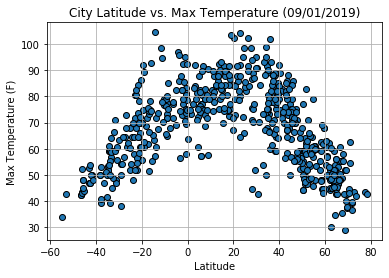

In [20]:
#Plotting the Data
#Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
#Save the plotted figures as .pngs.
#Latitude vs. Temperature Plot
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", edgecolors="black")
plt.title(f"City Latitude vs. Max Temperature ({time.strftime('%m/%d/%Y')})")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Latitude_vs_max_temp.png")
plt.show()

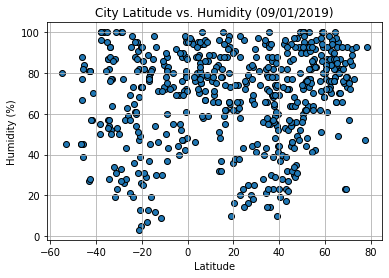

In [22]:
#Latitude vs. Humidity Plot
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", edgecolors="black")
plt.title(f"City Latitude vs. Humidity ({time.strftime('%m/%d/%Y')})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Latitude_vs_humidity.png")
plt.show()

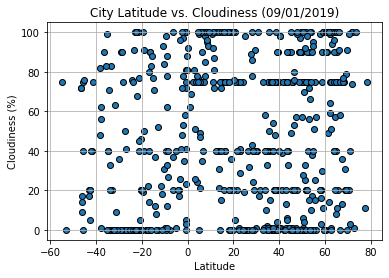

In [23]:
#Latitude vs. Cloudiness Plot
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", edgecolors="black")
plt.title(f"City Latitude vs. Cloudiness ({time.strftime('%m/%d/%Y')})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Latitude_vs_Cloudiness.png")
plt.show()

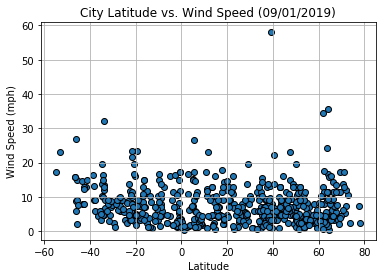

In [24]:
#Latitude vs. Wind Speed Plot
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", edgecolors="black")
plt.title(f"City Latitude vs. Wind Speed ({time.strftime('%m/%d/%Y')})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Latitude_vs_humidity.png")
plt.show()